In [2]:
import pandas as pd
import numpy as np 

In [4]:
df = pd.read_pickle('/home/mglee/VSCODE/complain/2030birth/df_2030.pk')

In [5]:
df

,제목,본문,민원발생지,민원신청경로,접수기관,처리부서,성별,나이,접수일,year,type
0,로스쿨 특별전형 입학자 생계급여공제 관련청원,안녕하세요. 서울내 모대학교 법학전문대학원에 재학하고 있는 학생입니다. 법학전문대학...,서울특별시,국민신문고 Web,보건복지부,보건복지부 사회복지정책실 복지정책관 자립지원과,남자,36,2018-03-16 11:06:25,2018,일반
1,아파트 단지내에 장애인 주차구역,단지 내 주차구역도 신고가 되나요?\n\n다들 주차공간부족하고 눈치봐가면서 주차하고...,광주광역시,국민신문고 APP,광주광역시 북구,광주광역시 북구 복지경제국 노인장애인복지과,여자,34,2018-03-16 10:58:33,2018,일반
2,적법하지 못한 형태로 교습을 진행하고 있는 불법업체를 고발합니다.,[피민원인 정보] \r\n- 상호명 : 원주스파르타스터디센터독서실\r\n- 주소 :...,경기도,국민신문고 Web,강원도교육청,강원도교육청 강원도원주교육지원청 행정과,남자,38,2018-03-16 11:19:26,2018,일반
3,제품명 영문 혼용 표시 문의,귀 처의 무궁한 발전을 기원합니다. \r\n\r\n문의드리고자 함은 아래와 같습니다...,서울특별시,국민신문고 기관프레임 Web,식품의약품안전처,식품의약품안전처 식품안전정책국 식품안전표시인증과,남자,36,2018-03-16 14:20:20,2018,일반
4,온천천 도로 공사 관련 민원 신청의 건,안녕하세요 금정구에 거주중인 회사원입니다.\r\n\r\n요즘들어 상수도 공사가 한창...,부산광역시,국민신문고 Web,부산광역시,부산광역시 건설본부 토목시설부 토목2팀,남자,31,2018-03-16 11:42:54,2018,일반
...,...,...,...,...,...,...,...,...,...,...,...
4115,동탄 2신도시 경부고속도로 지하화 구간 남단 &#x28;800m&#x29; 차량 진...,안녕하세요.\r\n귀 기관의 노고에 감사드립니다. \r\n​\r\n동탄 2신도시 경...,경기도,국민신문고 Web,국민권익위원회,국민권익위원회 사무처 고충처리국 교통도로민원과,남자,36,2021-03-30 09:06:04,2021,고충
4116,배곧분동 똑바로 하십시오,1. 배곧 분동 공정하게 계획대로 7월에 처리해 주십시오. 몇몇 단체들의 욕심으로 ...,경기도,국민신문고 APP,국민권익위원회,국민권익위원회 사무처 고충처리국 행정문화교육민원과,여자,39,2021-03-30 14:58:45,2021,고충
4117,동탄2 경부지하화 구간 진출입로 방음터널 요청건,경부고속도로 직선화 구간 남단 &#x28;800M&#x29; 방음터널 추가 설치를 ...,경기도,국민신문고 Web,국민권익위원회,국민권익위원회 사무처 고충처리국 교통도로민원과,남자,38,2021-03-30 11:02:42,2021,고충
4118,사회복무요원은 죄를 지은 사람인가요?,저는 출퇴근이 왕복3시간 소요되는 사회복무요원입니다 .\r\n이로 인해 2주전부터 ...,경상북도,국민신문고 APP,국민권익위원회,국민권익위원회 사무처 고충처리국 국방보훈민원과,남자,21,2021-03-29 17:58:52,2021,고충


In [6]:
from konlpy.tag import Okt

In [7]:
okt = Okt()

In [7]:
body = df['본문']

tok = []
for txt in body:
    tok.append(okt.nouns(str(txt)))

In [8]:
from gensim.models import FastText

In [9]:
model = FastText(tok, window=6, min_count=5, workers=4, sg=1)

In [11]:
model.wv.most_similar("원전", topn = 15)

[('탈', 0.7018119692802429),
 ('폐쇄해', 0.656972348690033),
 ('페기', 0.606849193572998),
 ('울진원전', 0.6057741641998291),
 ('핵발전소', 0.6024643778800964),
 ('후쿠시마현', 0.5993140935897827),
 ('원자력발전소', 0.5984238982200623),
 ('지열발전소', 0.5980384945869446),
 ('원자력발전', 0.5967492461204529),
 ('탈핵', 0.5944671034812927),
 ('월성원자력발전소', 0.5889718532562256),
 ('고창군', 0.5883920788764954),
 ('전소', 0.5817407965660095),
 ('포화상태', 0.5782170295715332),
 ('한울원전', 0.5772468447685242)]

In [12]:
model.save('ft_nuclear')

In [30]:
model.wv.most_similar(['한수원', '월성'])

[('한울', 0.7935118079185486),
 ('호기', 0.7884874939918518),
 ('한울원전', 0.7819142937660217),
 ('수명연장', 0.7697598934173584),
 ('한수', 0.7613365054130554),
 ('신고리', 0.7552295923233032),
 ('월성원자력발전소', 0.7374343276023865),
 ('한빛', 0.7365232110023499),
 ('한울원자력발전소', 0.7359129190444946),
 ('영광원전', 0.722649335861206)]

In [57]:
sent_vect_lst = []
for i in range(len(tok)):
    sent_vect = np.zeros(100)
    for token in tok[i]:
        sent_vect += model.wv[token]
    sent_vect_lst.append(sent_vect)

In [77]:
from sklearn.manifold import TSNE


In [78]:
tsne_model = TSNE(2)

In [79]:
tsne_vect = tsne_model.fit_transform(sent_vect_lst)

In [81]:
import matplotlib.pyplot as plt

In [98]:
tsne_df = pd.DataFrame(tsne_vect)
tsne_df

,0,1
0,4.331076,10.581779
1,64.065369,2.260036
2,-5.662388,-72.349747
3,-12.862644,61.251534
4,49.323811,5.123296
...,...,...
9861,63.189529,-10.790092
9862,-18.239283,52.881893
9863,-40.959953,-15.133290
9864,-51.793404,-9.601971


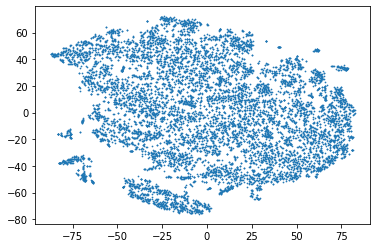

In [108]:
plt.scatter(tsne_df[0], tsne_df[1], s = 0.5)

In [67]:
from sklearn.metrics.pairwise import cosine_similarity

In [70]:
def similarity_matrix(sentence_embedding):
    sim_mat = np.zeros([len(sentence_embedding), len(sentence_embedding)])
    for i in range(len(sentence_embedding)):
        for j in range(len(sentence_embedding)):
            sim_mat[i][j] = cosine_similarity(sentence_embedding[i].reshape(1, 100),
                                              sentence_embedding[j].reshape(1, 100))[0,0]
    return sim_mat

In [ ]:
def similarity_matrix2(sentence_embedding):
    sim_mat = np.zeros([len(sentence_embedding), len(sentence_embedding)])
    for i in range(len(sentence_embedding)):
        for j in range(i, len(sentence_embedding)):
            if i > j: 
                sim_mat[i][j] = cosine_similarity(sentence_embedding[i].reshape(1, 100),
                                                sentence_embedding[j].reshape(1, 100))[0,0]
            elif i == j:
                sim_mat[i][j] = 1
            else:
                sim_mat[j][i] = sim_mat[i][j] 
    return sim_mat

In [72]:
sim_temp = similarity_matrix(sent_vect_lst)

In [161]:
sim_df = pd.DataFrame(sim_temp)
sim_idx = []
for i in range(len(sim_df)):
    sim_idx.append(sim_df[i].sort_values(ascending=False)[1:4].index)

In [172]:
import sys
f = open('nuclear_ft_doc_sim.txt', 'w')

for i in range(len(sim_idx)):
    print("원문 ::::", df.iloc[i].본문, file = f)
    for j in sim_idx[i]:   
        print('----------------------------------', file = f)
        print("유사 문서 :::",  df.iloc[j].본문, file = f)
    print("======================================", file = f)
    
f.close()